In [17]:
import pandas as pd

df_netflix = pd.read_csv("netflix daily top 10.csv")

df_netflix

,As of,Rank,Year to Date Rank,Last Week Rank,Title,Type,Netflix Exclusive,Netflix Release Date,Days In Top 10,Viewership Score
0,2020-04-01,1,1,1,"Tiger King: Murder, Mayhem …",TV Show,Yes,"Mar 20, 2020",9,90
1,2020-04-01,2,2,-,Ozark,TV Show,Yes,"Jul 21, 2017",5,45
2,2020-04-01,3,3,2,All American,TV Show,NaN,"Mar 28, 2019",9,76
3,2020-04-01,4,4,-,Blood Father,Movie,NaN,"Mar 26, 2020",5,30
4,2020-04-01,5,5,4,The Platform,Movie,Yes,"Mar 20, 2020",9,55
...,...,...,...,...,...,...,...,...,...,...
7095,2022-03-11,6,5,1,Worst Roommate Ever,TV Show,Yes,"Mar 1, 2022",10,81
7096,2022-03-11,7,7,2,Vikings: Valhalla,TV Show,Yes,"Feb 25, 2022",14,100
7097,2022-03-11,8,8,-,Shooter,Movie,NaN,"Aug 1, 2014",3,7
7098,2022-03-11,9,9,7,Shrek 2,Movie,NaN,"Mar 1, 2022",10,33


In [18]:
df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   As of                 7100 non-null   object
 1   Rank                  7100 non-null   int64 
 2   Year to Date Rank     7100 non-null   object
 3   Last Week Rank        7100 non-null   object
 4   Title                 7100 non-null   object
 5   Type                  7100 non-null   object
 6   Netflix Exclusive     4599 non-null   object
 7   Netflix Release Date  7100 non-null   object
 8   Days In Top 10        7100 non-null   int64 
 9   Viewership Score      7100 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 554.8+ KB


In [19]:
df_netflix.describe()

,Rank,Days In Top 10,Viewership Score
count,7100.000000,7100.000000,7100.000000
mean,5.500000,24.123662,122.790141
std,2.872484,58.473789,213.861642
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,19.000000
50%,5.500000,7.000000,50.000000
75%,8.000000,18.000000,128.000000
max,10.000000,428.000000,1474.000000


In [20]:
df_netflix["As of"] = pd.to_datetime(df_netflix["As of"])
df_netflix["Netflix Release Date"] = pd.to_datetime(df_netflix["Netflix Release Date"])

In [21]:
# Tipos de Dados disponíveis

df_netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   As of                 7100 non-null   datetime64[ns]
 1   Rank                  7100 non-null   int64         
 2   Year to Date Rank     7100 non-null   object        
 3   Last Week Rank        7100 non-null   object        
 4   Title                 7100 non-null   object        
 5   Type                  7100 non-null   object        
 6   Netflix Exclusive     4599 non-null   object        
 7   Netflix Release Date  7100 non-null   datetime64[ns]
 8   Days In Top 10        7100 non-null   int64         
 9   Viewership Score      7100 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 554.8+ KB


In [22]:
# Período de análises feita

df_netflix.describe()

,As of,Rank,Netflix Release Date,Days In Top 10,Viewership Score
count,7100,7100.000000,7100,7100.000000,7100.000000
mean,2021-03-21 12:00:00.000000256,5.500000,2020-06-21 08:05:32.619718144,24.123662,122.790141
min,2020-04-01 00:00:00,1.000000,2007-01-15 00:00:00,1.000000,1.000000
25%,2020-09-25 00:00:00,3.000000,2020-04-26 00:00:00,3.000000,19.000000
50%,2021-03-21 12:00:00,5.500000,2020-10-02 00:00:00,7.000000,50.000000
75%,2021-09-15 00:00:00,8.000000,2021-05-14 00:00:00,18.000000,128.000000
max,2022-03-11 00:00:00,10.000000,2022-03-04 00:00:00,428.000000,1474.000000
std,NaN,2.872484,NaN,58.473789,213.861642


In [23]:
df_netflix.shape

(7100, 10)

In [26]:
df_netflix.isna().sum()

As of                      0
Rank                       0
Year to Date Rank          0
Last Week Rank             0
Title                      0
Type                       0
Netflix Exclusive       2501
Netflix Release Date       0
Days In Top 10             0
Viewership Score           0
dtype: int64

<Axes: >

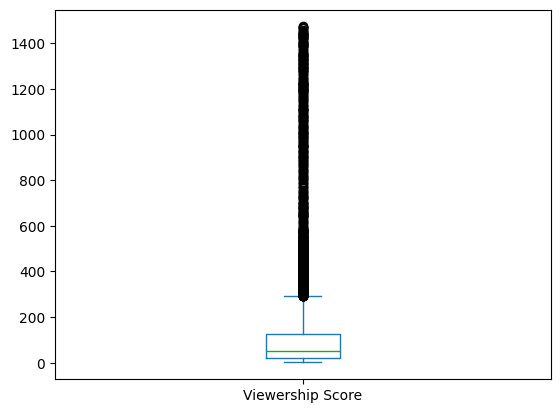

In [31]:
df_netflix["Viewership Score"].plot.box()

In [34]:
from scipy import stats
import numpy as np

outliers = df_netflix[np.abs(stats.zscore(df_netflix["Viewership Score"])) > 3]
len(outliers)

201

 - Tipos de dados disponíveis
   - As of:   datetime64[ns]
   - Rank:   int64         
   - Year to Date Rank:   object        
   - Last Week Rank:   object        
   - Title:   object        
   - Type:   object        
   - Netflix Exclusive: object        
   - Netflix Release Date:   datetime64[ns]
   - Days In Top 10:   int64         
   - Viewership Score:   int64      
 - Período da análise feita: 2020-04-01 a 2022-03-11
 - Tamanho da base de dados: 7100 linhas, 10 colunas
 - Verificar dados nulos: 2501 no campo Netflix Exclusive
 - Outliers